In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
reg_no = "21BBS0166"

In [ ]:
data_file = 'Tatamotors7.csv'  # Replace with your dataset file
data = pd.read_csv(data_file)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [ ]:
data = data.sort_values(by='Date', ascending=True)

In [ ]:
data = data.drop_duplicates(subset='Date')

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
print(f"Data preview (RegNo: {reg_no}):")
print(data.head())

Data preview (RegNo: 21BBS0166):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-02  527.500000  544.500000  522.900024  542.250000  540.565247   
2017-01-03  455.899994  455.899994  448.000000  449.450012  448.053558   
2017-01-06  476.950012  479.700012  473.549988  476.649994  475.169037   
2017-01-08  446.549988  452.350006  445.700012  446.899994  445.511475   
2017-01-09  379.350006  392.850006  378.649994  390.850006  389.635620   

             Volume  
Date                 
2017-01-02  4786720  
2017-01-03  8367579  
2017-01-06  3001232  
2017-01-08  4012791  
2017-01-09  7380325  


In [ ]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()
data['365_MA'] = data['Close'].rolling(window=365).mean()
data['500_MA'] = data['Close'].rolling(window=500).mean()

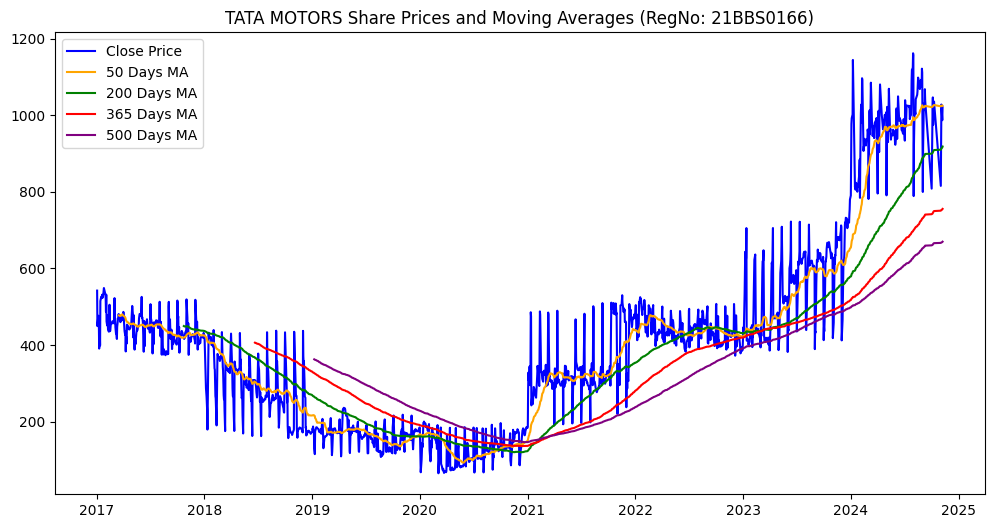

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['50_MA'], label='50 Days MA', color='orange')
plt.plot(data['200_MA'], label='200 Days MA', color='green')
plt.plot(data['365_MA'], label='365 Days MA', color='red')
plt.plot(data['500_MA'], label='500 Days MA', color='purple')
plt.title(f"TATA MOTORS Share Prices and Moving Averages (RegNo: {reg_no})")
plt.legend()
plt.show()

In [ ]:
data['Close_diff'] = data['Close'].diff().dropna()

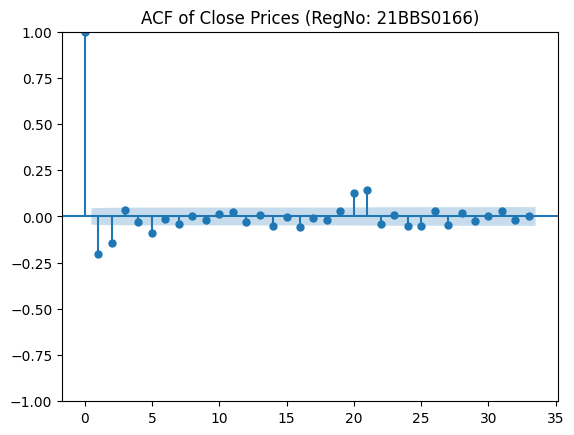

In [ ]:
plot_acf(data['Close_diff'].dropna(), title=f"ACF of Close Prices (RegNo: {reg_no})")
plt.show()

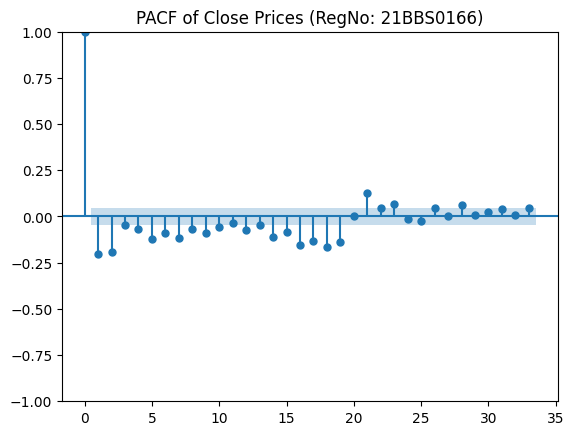

In [ ]:
plot_pacf(data['Close_diff'].dropna(), title=f"PACF of Close Prices (RegNo: {reg_no})")
plt.show()


# Step 4: Fit the ARIMA model
# Using (p, d, q) = (1, 1, 1) as an example

In [ ]:
model = ARIMA(data['Close'], order=(1, 1, 1))
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(f"ARIMA Model Summary (RegNo: {reg_no}):")
print(arima_model.summary())

ARIMA Model Summary (RegNo: 21BBS0166):
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1892
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9873.761
Date:                Sat, 16 Nov 2024   AIC                          19753.521
Time:                        20:20:39   BIC                          19770.156
Sample:                             0   HQIC                         19759.646
                               - 1892                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5932      0.020     29.480      0.000       0.554       0.633
ma.L1         -0.9252      0.010    -95.395      0.000      -0.944      -0.906
sigma2      

In [ ]:
forecast = arima_model.get_forecast(steps=50)
forecast_index = pd.date_range(start=data.index[-1], periods=50, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
confidence_intervals = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

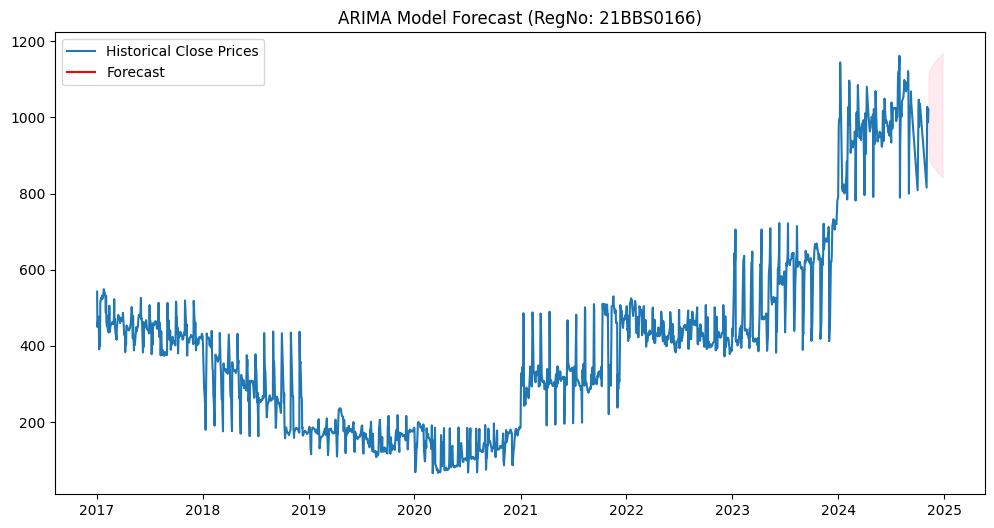

In [ ]:
# Plot Forecast and Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, lower_limits, upper_limits, color='pink', alpha=0.3)
plt.title(f"ARIMA Model Forecast (RegNo: {reg_no})")
plt.legend()
plt.show()

In [ ]:
# Step 6: Summarize Autocorrelations
print(f"Autocorrelations Summary (RegNo: {reg_no}):")
print("AR Coefficients:", arima_model.arparams)
print("MA Coefficients:", arima_model.maparams)

Autocorrelations Summary (RegNo: 21BBS0166):
AR Coefficients: [0.59324131]
MA Coefficients: [-0.92521609]
